# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
1. The smart cab doesn't move at all
2. The agent is rewarded by driving safely. 
3. When red light happens and it gets reward for not moving. When green light happens, it gets penalty(negative rewards) for blocking the traffic. If I enforce deadline it looks like each time it stops at the green light the penalty increases.


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
1. Three flags can be: Random exploration factor epsilon that is affecting how exploration and exploitation happen ,Learning factor alpha that controls the learning step and enforce_deadline to indicate whether metrix takes into account of deadline
2. act function.
3. render()is the GUI render display of the simulation. render_text() is the non-GUI render display of the simulation
4. No it doesn't consider North-South or East-west first. next_waypoint() in plannar.py checks the following things in order: 
    1. It first checks if desination is reached,if so return None. If not it checks further on:
    2. If destination is cardinally East or West of location 
        1. if the agent is heading directly toward the destination, the waypoint will be straight forward.
        2. If the destination is south-east of the current location and the agent is heading west, it needs to turn left. 
        2. If the destination is south-east of the current location and the agent is heading east, it needs to turn right
        3. If the destination is north-east of the current location and the agent is heading west,it needs to turn right
        4. If the desination is north-east of the current location and the agent is heading east,it needs to turn left
        5. If the destination is east of the current location and agent is driving north or the destination is west of the current location and agent is driving south, it needs to turn left otherwise right
    3. If destinatino is cardinally North or South of location
        1. if the agent is heading directly toward the destination, the waypoint will be straight forward.
        2. If the destination is south-west of the current location and the agent is heading north, it needs to turn left. 
        2. If the destination is south-east of the current location and the agent is heading north, it needs to turn right
        3. If the destination is north-east of the current location and the agent is heading south,it needs to turn left
        4. If the desination is north-west of the current location and the agent is heading south,it needs to turn right
        5. If the destination is north of the current location and agent is driving east or the destination is south of the current location and agent is driving west, it needs to turn right otherwise left        

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


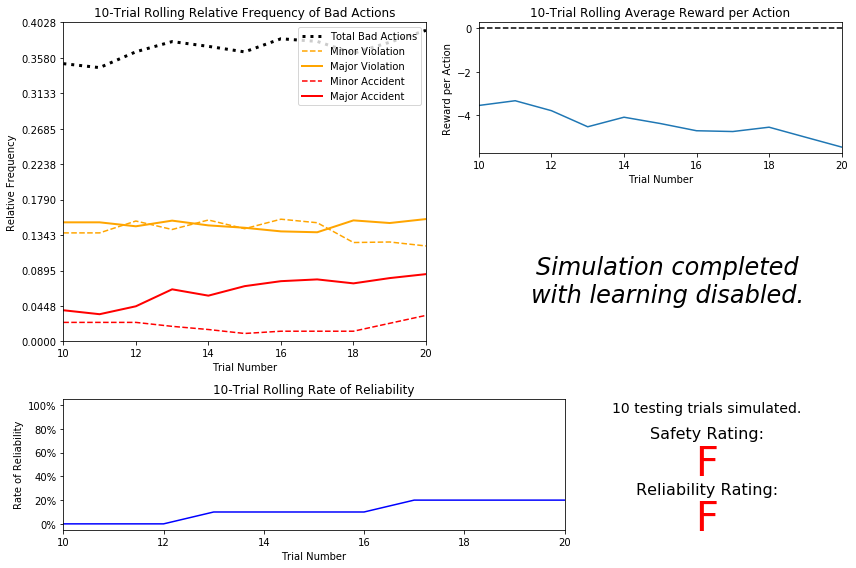

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
1. Without any learning, driving agent makes bad decision around 40% of the times. Around 8% of the time leads to major accident and another 4% of the time leads to minor accidents. The major/minor violation rate is high around 15%.
2. Since the action is taken randomly, the rating of safety driving and reliability driving doesn't provide much information about how well the agent(in the conventional sense that the agent at least knows traffic rules) is driving. Actually the agent is driving very badly.
3. The reward system is : -40 for major accidents, -20 for minor accidents, -10 for major violation, -5 for minor violation. When the agent makes a safe action, +2 - deadline penalty for move toward destination or idle at red light, +1 - deadline penalty for safe move but not correct move(should have gone right but stay idle). The deadlie penalty is designed that it starts as 0 and as the running time approaches deadline, it will gradually approach toward 1.

 The rewards showing are all below 0 and going down even more. From the log it seems that when the agent gets positive reward, it is always staying idle in front of the red light which is a random lucky pick. It gets penalty when a traffic violation is made or even worse causes an accident.
 
 I would say from the graph curve, the agent is penalized heavily when causing accidents or violations. 
4. No. The result doesn't change. I think it is because there is no learning involved and the agent is taking random actions. Therefore overtime, there is no improvement made on result.
5. No. Not safe or reliable at all in the case for any passages.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**
1. For safety, inputs are important.  Those are the cars and events surrouding the agent and when the agent has to make a decision, it needs to decide whether it is allowed to head toward certain direction. When action leads to violation or accidents under certain condition it will get penalty. light is critical for whether forward or left turn are allowed. Left traffic determins if right turn on red light is allowed. Oncoming traffic determins if left turn can be made on green light. Right traffic doesn't really determin any rules but for areas that only have stop sign/ or no sign control, it determins if forward can be made. 
2. For efficiency, I think waypoint is important. Given a waypoint, agent's action could be considered as optimal so to get a reward. 
3. I'm not including deadline in the state. This is not fixed length state numbers so to put it in a table is difficult. Also the number of stats follows the Curse of dimensionality. If I put 30 states in deadline entry in additional to existing states I need to run a lot more training. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
1. I chose state = (waypoint, inputs). Waypoint has 3 possible directions ['forward','left','right'].None is used only when reaching destination. So not needed in the Q table.   Inputs  = {'light': 'green' or 
'red', 'oncoming': 4 directions, 'right': 4 directions, 'left': 4 directions}.So overal, state space has 3 x 2 x 4 x 4 x4 = 384 states.  9 bit total. Q table will have 384 entries at the most
2. I think it is possible to learn those states in reasonable amount of training trials. The next cell shows my estimation on how many trials are needed If I need to cover at least 99% of all possible state_action pairs with all random exploration.
3. In real codes, I iterate around 250 times considering espilon is decaying through trials

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

def percent_visited(steps, visited,states):
    for _ in range(steps):
        current_state = random.randint(0, states-1)
        visited[current_state] = True
    return sum(visited)/float(states)


# 384 states * 4 action possible
states = 384*4
coverage = 0
trial_runs = 0
#If I were to achieve 100% coverage of the Q table how many trials needed? A LOT!
for i in range(0,10):
    visited = np.zeros(states, dtype=bool)
    while True:
        # on this work deadline is chosen on distance * 5. distance is minimum 5 steps away
        # The grid size (8,6) from top left to bottom down 14 steps
        n_steps = random.choice([s*5 for s in range(5,14)]) # steps in one episodes
        coverage = percent_visited(n_steps,visited, states)
        trial_runs += 1
        if coverage >=0.99:
            break
    #print(coverage)
print("minimum trial numbers needed for 99% states to be visited: ",trial_runs/10)

minimum trial numbers needed for 99% states to be visited:  162.2


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

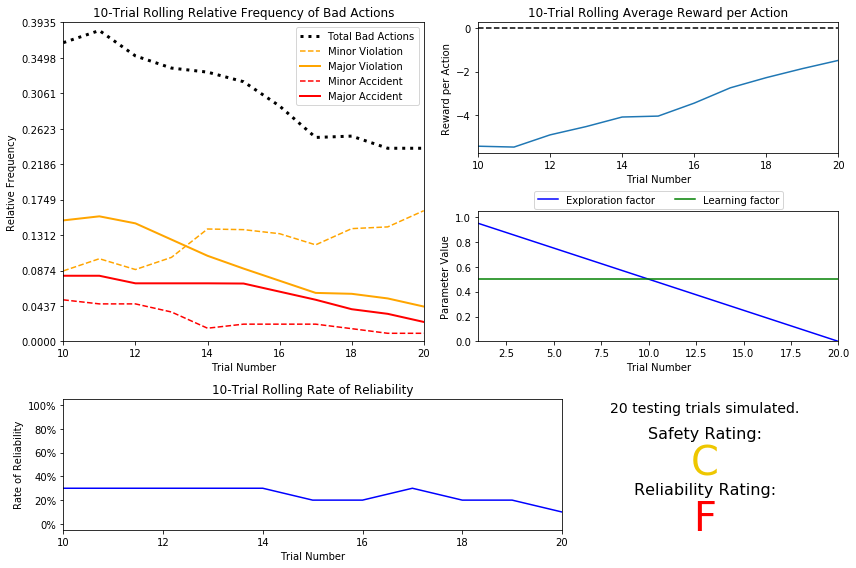

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
# this is drawn with alpha = 0.5, gamma = 0.0 
# epsilon -= 0.05
# tolerance = 0.02
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and efficiently rating compare to the initial driving agent?*

**Answer:**

1. The total bad actions goes down especially major violation/accidents accidents. That is different from random action in previous session 
2. The trials go for 20 episodes before testing starts. I used epsilon decay step 0.05 so total 1 / 0.05 = 20 trials 
3. I used epsilon decay step 0.05 and alpha 0.5.The parameter panel shows up precisely.
4. As the number of training trials increased, average reward increases. Both average reward and  bad action reduction rate goes down very slowly. The minor violation even goes up a little bit.  That shows I need to tune the parameters.
5. Safety goes up to C and  reliability  still not improved

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

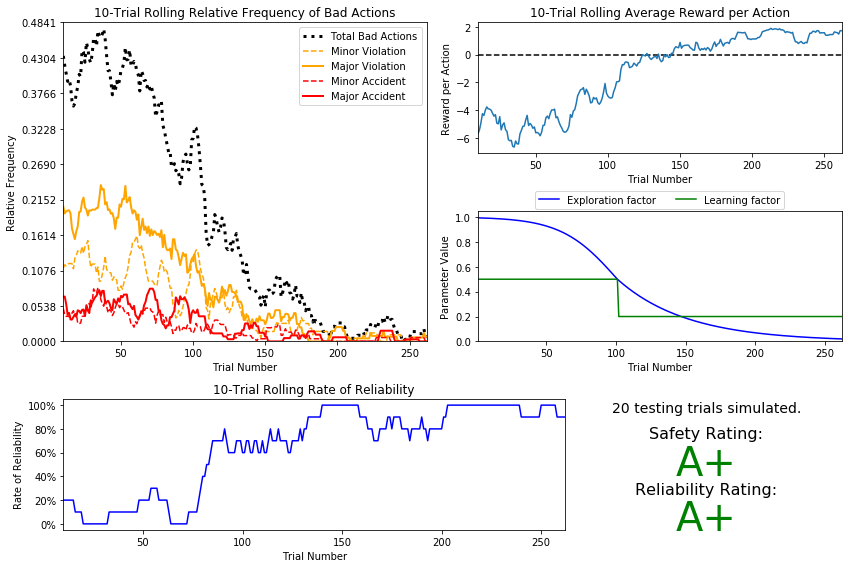

In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# this is drawn with gamma = 0.0 
# epsilon = 1.0/(1+exp(0.05 * (t-100))) alpha = 0.5  t <=100 
# epsilon = 0.5/(1+exp(-0.02*(t-100))) alpha = 0.2 t > 100
# tolerance = 0.02
# Use decision tree regression to predit Q value when a state,action is not explored before
# maybe using a SVM in the future?
vs.plot_trials('sim_improved-learning.csv')

### Further thoughts
* QLearning seems to have variance regardless what parameters I tuned. The rating varies sometimes run to run between A and A+. But all above B rating in any given run.
* Given the fact that I have 384 states, each state having 4 possible action, through the calculation I needed to run around 350 all random exploration trials to cover all the state action pair in Q table. That doesn't seem to be efficient. If I were to aim at seeing 99% of the table trial number goes down to around 160 times.   

* I have seen a few conditions that the driver chooses bad action in test when
    1. The state hasn't been visited at all. Driver is forced to pick a random action 
    2. The state has been visited but not all actions are explored. When there is unvisited actions present (Q value= 0.0) and the rest of actions are having negative values,driver based on pure values (0.0 vs all negative)chooses the unvisited action and that might cause major accidents.
    3. There are tied max values and driver is forced to pick a random value. That also might cause accident.


* The testing depends on each state_action pair having a valid Q max (not 0.0 as init value). This brings up the question that if I have a much larger state table and during training not all state_action pairs have been seen what is the proper action to use for a unseen new state? I implemented fit_and_predit_DT() using decision tree regressor and fit_and_predit_Linear() using linear regression for prediting Q value when a state, action not seen before when choosing action. This seems to achieve good results. If no prediction is used, I need to train a lot more times to even get a B rating. With prediction enabled, the accident reduction appraches alomost to 0 in about 200 trials. The safety rating jumps to A+

* For Q function approximation. Decision tree regressor predicts better than  linear regressor. I believe the nature of features favours decision tree regression. With Linear regressor I'm able to get A rating in safety  and major accidents approaches 0 around 220 trials. With decision tree regressor, I'm always getting A+ rating. At the same setting, major accident and major violation reduction converge to 0 even faster in about 200 trials.In term of prediction accuracy, decision tree regressor predicted better than linear regression given training data in the Q table. During my experiment, for example on this state 194 ('left', {'oncoming': 'forward', 'right': 'right', 'left': 'forward', 'light': 'red'}), when it was first encoutered in test run (no training trials ever run into this state), the only option is to stay idle and forward/left would cause major accident and turning right on this state would causes cross traffic accident. Decision tree predicts exactly what is should be with proper penalization:  {'forward': -23.34, None: 0.162, 'left': -23.37, 'right': -13.56}.  


* I think we need to consider agent's ability to query/feedback from enviorement to choose the best action. At a given point,agent with traffic rule knowledge is able to know which action is the safe action and which action might move closer to the destination. Based on this understanding, I wrote feedback() in enviorement.py to feedback agent's query for violation code and distance delta from the current location for a possible action. Based on the feeback, th agent chooses the highest Q with safe action that moves closer to the destination.  It get better results than just learning Q without domain knowledge and the bad actions approach 0 quickly


* The domain knowledge might be considered cheating in this homework but I just wanted to point out if agent is able to understand the enviorement maybe we should make good use of it. Below drawing shows the usage of domain knowledge without prediction

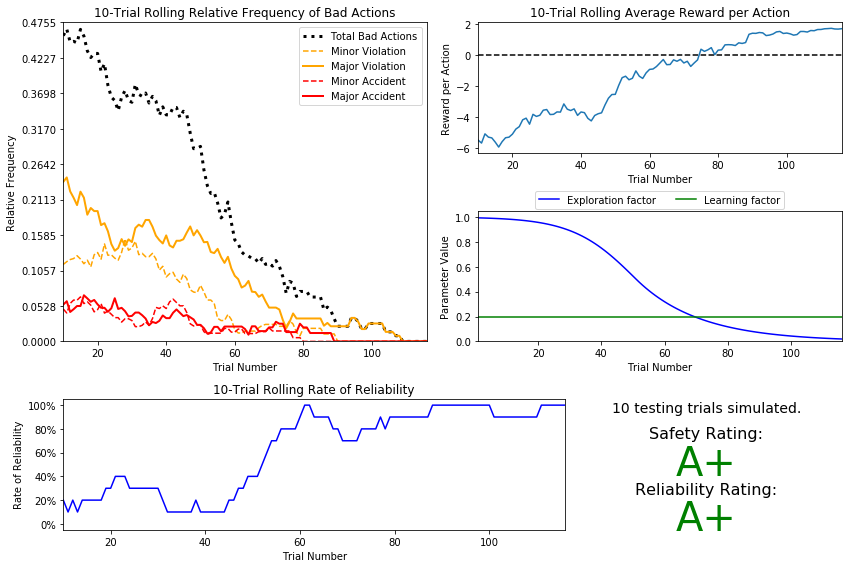

In [6]:
# I use less trial numbers with feedback implemenetation and the number of accidents approaches 0 quickly.
# this is drawn with alpha = 0.2, gamma = 0.0 
# epsilon = 1.0/(1+exp(0.1 * (t-50)))  t <=50  alpha = 0.2 
# epsilon = 0.5/(1+exp(-0.05*(t-50))) t > 50   alpha = 0.2
# tolerance = 0.02
# peek flag is True in choose_action and no prediction is used. Just domain knowledge
vs.plot_trials('sim_improved-learning_with_feedback.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
The answer is based on trails on sim_improved_learning with no feedback from enviorement. 
1. I used below functions:
$$ alpha = 0.5 \hspace{20px} \epsilon = 1.0/(1+exp(0.05 * (t-100)))\hspace{10px}      \textrm{for } t<=100  \hspace{20px} 
 alpha = 0.2 \hspace{20px}   \epsilon = 0.5/(1+exp(-0.02*(t-100)))  \hspace{10px}       \textrm{for } t > 100 \hspace{20px} $$
2. Approximately around 250 trials before testing
3. I use epsilon-tolerance = 0.02 and alpha = 0.5 when epsilon <= 0.5 and alpha =0.2 when epsilon>0.5 . This is achieving the best result in the improved_learning trials. (not the with feedback).  
4. It improves a lot. The agent is able to achieve  A+  safety and A+ in reliability rate. 
5. I think the agent is succesfully learned an approriate policy
6. I'm happy with the result.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 
* The optimal policy I think should be the one that achieves: obey all traffic rules and safe driving.The optimal policy instructions are: 
    1. All forward/left drive actions in red lights are not allowed thus needed to be penalized heavily in all Q states.
    2. Idle at red light is always safe. 
    3. Turning right on red light is only allowed when left side has no coming traffic.
    4. Idle at green light is blocking traffic. It is violation
    5. Forward/Right turn on green light is safe
    6. Left turn on green light is only allowed when oncoming traffic is None.(Some cities have seperate left turn light. If that is the case. left turn should follow left turn light signal)
    
* If we are not allowed to get feedback from enviorement, when choosing a action based on max_q value,I'll iterate through  4 (action, value) pairs in Q[state]. If one value is 0.0 that means it was never explored before.  I use Decision Tree regression to predict its value and use the predicted value along with other known values to choose a max Q value action.

* I'll answer them together. There are a few examples in the Q-table of the optimal policy learning.
* First of all, all actions in a given state having a Q value because of the  regression/prediction involved in choosing action and planning(approximate other unseen action in a state that is just reached) after reward is given. However there are only 338 entries which is around 90% of all states.

* Second, all illegal actions are heavily penalized. For example state 380.

state 380: ('right', {'right': 'forward', 'left': None, 'oncoming': None, 'light': 'red'})
 -- forward : -38.85
 -- left : -39.38
 -- None : 0.91
 -- right : 1.79

For this state, staying idle is clearly the correct choice otherwise it might be a minor violation. Left and forward have been heavily penalized. Learning agent actually chooses the correct action 

* Third, the correct action has slightly higher value than safe but incorrect action value.

state 171: ('left', {'right': None, 'left': 'right', 'oncoming': 'right', 'light': 'green'})
 -- forward : -0.16
 -- left : -4.16
 -- None : -1.67
 -- right : -0.11
 
For this state, action None is blocking traffic and turning left would cause accident. Both forward and right are safe actions (values>0). Moving forward moves the driver toward destination because it is also the waypoint action. So forward has slightly higher value than moving right and that is the optimal policy learnt.
 
* Finally, there are also instances not reflecting the best action. For example

state 28: ('forward', {'right': 'forward', 'left': None, 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.34
 -- left : 0.34
 -- None : -2.75
 -- right : 1.06

On this case, the agent drives right instead of forward. When the agent got the state 28 with action right it was under random exploration in trial 27 in step 15. The forward action value was predicted by decision tree regressor to 0.34 and this action never gets further updated by real visit. So the value stays there. On the other side, action right gets visited a few times more in the later trials and even the driver chooses the incorrect but safe action, the Q gets a small amount of rewards and finally at the test moment, right action Q value wins over forward by a good margin. The agent chooses the safe action but not following the waypoint. So less reward. 


* Because the reward system penalizes unsafe driving a lot more than unefficient driving that doesn't follow the waypoint, the agent eventually learns to be rather safe than sorry when multiple choices present
  

/-----------------------------------------
| State-action rewards from Q-Learning
\-----------------------------------------

state 383: ('right', {'right': None, 'left': None, 'oncoming': None, 'light': 'red'})
 -- forward : -9.89
 -- left : -9.72
 -- None : 0.35
 -- right : 1.84

state 379: ('right', {'right': None, 'left': 'right', 'oncoming': None, 'light': 'red'})
 -- forward : -8.83
 -- left : -8.61
 -- None : 0.87
 -- right : 2.08

state 380: ('right', {'right': 'forward', 'left': None, 'oncoming': None, 'light': 'red'})
 -- forward : -38.85
 -- left : -39.38
 -- None : 0.91
 -- right : 1.79

state 319: ('right', {'right': None, 'left': None, 'oncoming': None, 'light': 'green'})
 -- forward : 0.65
 -- left : 0.31
 -- None : -5.23
 -- right : 1.81

state 123: ('forward', {'right': None, 'left': 'right', 'oncoming': None, 'light': 'red'})
 -- forward : -10.51
 -- left : -10.52
 -- None : 1.84
 -- right : 0.58

state 31: ('forward', {'right': None, 'left': None, 'oncoming': 'left', 'light': 'green'})
 -- forward : 1.97
 -- left : 0.36
 -- None : -4.79
 -- right : 0.79

state 87: ('forward', {'right': None, 'left': 'left', 'oncoming': 'left', 'light': 'red'})
 -- forward : -9.70
 -- left : -9.99
 -- None : 1.60
 -- right : 0.24

state 255: ('left', {'right': None, 'left': None, 'oncoming': None, 'light': 'red'})
 -- forward : -10.03
 -- left : -9.95
 -- None : 1.68
 -- right : 0.51

state 143: ('left', {'right': None, 'left': None, 'oncoming': 'forward', 'light': 'green'})
 -- forward : 0.27
 -- left : -18.50
 -- None : -4.85
 -- right : 1.02

state 248: ('left', {'right': 'forward', 'left': 'right', 'oncoming': None, 'light': 'red'})
 -- forward : -25.67
 -- left : -26.07
 -- None : 1.12
 -- right : 0.49

state 239: ('left', {'right': None, 'left': None, 'oncoming': 'right', 'light': 'red'})
 -- forward : -9.68
 -- left : -35.86
 -- None : 1.47
 -- right : 0.64

state 175: ('left', {'right': None, 'left': None, 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.85
 -- left : -17.72
 -- None : -4.92
 -- right : 1.03

state 189: ('left', {'right': 'left', 'left': None, 'oncoming': None, 'light': 'green'})
 -- forward : 0.45
 -- left : 2.20
 -- None : -4.47
 -- right : 0.86

state 15: ('forward', {'right': None, 'left': None, 'oncoming': 'forward', 'light': 'green'})
 -- forward : 1.74
 -- left : -19.66
 -- None : -5.14
 -- right : 0.74

state 156: ('left', {'right': 'forward', 'left': None, 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.39
 -- left : 1.40
 -- None : -2.19
 -- right : 0.21

state 254: ('left', {'right': 'right', 'left': None, 'oncoming': None, 'light': 'red'})
 -- forward : -7.58
 -- left : -9.04
 -- None : 1.68
 -- right : 0.75

state 243: ('left', {'right': None, 'left': 'forward', 'oncoming': None, 'light': 'red'})
 -- forward : -38.10
 -- left : -36.34
 -- None : 1.82
 -- right : -19.73

state 191: ('left', {'right': None, 'left': None, 'oncoming': None, 'light': 'green'})
 -- forward : 0.60
 -- left : 1.72
 -- None : -4.77
 -- right : 0.86

state 220: ('left', {'right': 'forward', 'left': None, 'oncoming': 'left', 'light': 'red'})
 -- forward : -30.21
 -- left : -24.80
 -- None : 1.67
 -- right : 0.36

state 223: ('left', {'right': None, 'left': None, 'oncoming': 'left', 'light': 'red'})
 -- forward : -10.24
 -- left : -10.29
 -- None : 2.21
 -- right : 0.53

state 159: ('left', {'right': None, 'left': None, 'oncoming': 'left', 'light': 'green'})
 -- forward : 1.03
 -- left : 1.97
 -- None : -4.84
 -- right : 0.65

state 188: ('left', {'right': 'forward', 'left': None, 'oncoming': None, 'light': 'green'})
 -- forward : 0.96
 -- left : 1.91
 -- None : -4.43
 -- right : 0.79

state 247: ('left', {'right': None, 'left': 'left', 'oncoming': None, 'light': 'red'})
 -- forward : -9.65
 -- left : -9.02
 -- None : 1.93
 -- right : 0.47

state 382: ('right', {'right': 'right', 'left': None, 'oncoming': None, 'light': 'red'})
 -- forward : -10.06
 -- left : -10.67
 -- None : 0.11
 -- right : 1.55

state 279: ('right', {'right': None, 'left': 'left', 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.59
 -- left : 0.88
 -- None : -4.91
 -- right : 1.65

state 51: ('forward', {'right': None, 'left': 'forward', 'oncoming': None, 'light': 'green'})
 -- forward : 1.78
 -- left : 0.33
 -- None : -4.93
 -- right : 0.50

state 369: ('right', {'right': 'left', 'left': 'forward', 'oncoming': None, 'light': 'red'})
 -- forward : -38.55
 -- left : -25.44
 -- None : -1.88
 -- right : -16.10

state 95: ('forward', {'right': None, 'left': None, 'oncoming': 'left', 'light': 'red'})
 -- forward : -10.05
 -- left : -9.83
 -- None : 1.74
 -- right : 0.45

state 63: ('forward', {'right': None, 'left': None, 'oncoming': None, 'light': 'green'})
 -- forward : 1.65
 -- left : 0.19
 -- None : -4.57
 -- right : 0.56

state 252: ('left', {'right': 'forward', 'left': None, 'oncoming': None, 'light': 'red'})
 -- forward : -26.74
 -- left : -39.23
 -- None : 2.10
 -- right : 0.77

state 179: ('left', {'right': None, 'left': 'forward', 'oncoming': None, 'light': 'green'})
 -- forward : 1.04
 -- left : 1.70
 -- None : -5.27
 -- right : 1.17

state 317: ('right', {'right': 'left', 'left': None, 'oncoming': None, 'light': 'green'})
 -- forward : 0.58
 -- left : 0.33
 -- None : -4.46
 -- right : 1.76

state 307: ('right', {'right': None, 'left': 'forward', 'oncoming': None, 'light': 'green'})
 -- forward : 0.01
 -- left : 0.63
 -- None : -4.68
 -- right : 1.43

state 306: ('right', {'right': 'right', 'left': 'forward', 'oncoming': None, 'light': 'green'})
 -- forward : 0.93
 -- left : 0.28
 -- None : -2.86
 -- right : 0.55

state 311: ('right', {'right': None, 'left': 'left', 'oncoming': None, 'light': 'green'})
 -- forward : 0.27
 -- left : 0.96
 -- None : -5.47
 -- right : 1.56

state 351: ('right', {'right': None, 'left': None, 'oncoming': 'left', 'light': 'red'})
 -- forward : -10.04
 -- left : -9.89
 -- None : 1.13
 -- right : 2.03

state 338: ('right', {'right': 'right', 'left': 'forward', 'oncoming': 'left', 'light': 'red'})
 -- forward : -12.31
 -- left : -12.34
 -- None : 0.45
 -- right : -6.50

state 274: ('right', {'right': 'right', 'left': 'forward', 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.00
 -- left : 0.00
 -- None : 0.00
 -- right : 0.61

state 309: ('right', {'right': 'left', 'left': 'left', 'oncoming': None, 'light': 'green'})
 -- forward : 0.52
 -- left : 0.29
 -- None : -2.90
 -- right : 1.99

state 349: ('right', {'right': 'left', 'left': None, 'oncoming': 'left', 'light': 'red'})
 -- forward : -9.13
 -- left : -9.98
 -- None : 0.51
 -- right : 1.95

state 49: ('forward', {'right': 'left', 'left': 'forward', 'oncoming': None, 'light': 'green'})
 -- forward : 2.01
 -- left : 0.87
 -- None : -4.35
 -- right : 0.23

state 335: ('right', {'right': None, 'left': None, 'oncoming': 'forward', 'light': 'red'})
 -- forward : -9.90
 -- left : -9.84
 -- None : 0.43
 -- right : 1.89

state 271: ('right', {'right': None, 'left': None, 'oncoming': 'forward', 'light': 'green'})
 -- forward : 0.34
 -- left : -20.05
 -- None : -3.07
 -- right : 1.83

state 313: ('right', {'right': 'left', 'left': 'right', 'oncoming': None, 'light': 'green'})
 -- forward : -0.09
 -- left : -0.14
 -- None : -2.15
 -- right : 1.47

state 285: ('right', {'right': 'left', 'left': None, 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.41
 -- left : 0.49
 -- None : -4.21
 -- right : 1.73

state 38: ('forward', {'right': 'right', 'left': 'left', 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.00
 -- left : 0.00
 -- None : -2.00
 -- right : 0.00

state 119: ('forward', {'right': None, 'left': 'left', 'oncoming': None, 'light': 'red'})
 -- forward : -10.02
 -- left : -10.00
 -- None : 1.27
 -- right : 1.05

state 184: ('left', {'right': 'forward', 'left': 'right', 'oncoming': None, 'light': 'green'})
 -- forward : 0.08
 -- left : 2.03
 -- None : -1.75
 -- right : -1.72

state 251: ('left', {'right': None, 'left': 'right', 'oncoming': None, 'light': 'red'})
 -- forward : -8.06
 -- left : -9.41
 -- None : 2.04
 -- right : 0.49

state 183: ('left', {'right': None, 'left': 'left', 'oncoming': None, 'light': 'green'})
 -- forward : 0.54
 -- left : 1.58
 -- None : -4.20
 -- right : 0.23

state 190: ('left', {'right': 'right', 'left': None, 'oncoming': None, 'light': 'green'})
 -- forward : 1.11
 -- left : 1.75
 -- None : -5.28
 -- right : -0.02

state 241: ('left', {'right': 'left', 'left': 'forward', 'oncoming': None, 'light': 'red'})
 -- forward : -17.40
 -- left : -35.22
 -- None : 1.80
 -- right : -10.00

state 185: ('left', {'right': 'left', 'left': 'right', 'oncoming': None, 'light': 'green'})
 -- forward : -0.15
 -- left : 1.03
 -- None : -2.47
 -- right : -1.15

state 142: ('left', {'right': 'right', 'left': None, 'oncoming': 'forward', 'light': 'green'})
 -- forward : 0.53
 -- left : -1.98
 -- None : -2.69
 -- right : -2.35

state 244: ('left', {'right': 'forward', 'left': 'left', 'oncoming': None, 'light': 'red'})
 -- forward : -24.04
 -- left : -31.67
 -- None : 1.80
 -- right : 0.86

state 221: ('left', {'right': 'left', 'left': None, 'oncoming': 'left', 'light': 'red'})
 -- forward : -10.57
 -- left : -10.47
 -- None : 2.02
 -- right : 0.60

state 33: ('forward', {'right': 'left', 'left': 'forward', 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.58
 -- left : -4.13
 -- None : -2.67
 -- right : -1.55

state 93: ('forward', {'right': 'left', 'left': None, 'oncoming': 'left', 'light': 'red'})
 -- forward : -7.06
 -- left : -10.12
 -- None : 1.62
 -- right : 0.77

state 81: ('forward', {'right': 'left', 'left': 'forward', 'oncoming': 'left', 'light': 'red'})
 -- forward : -20.09
 -- left : -12.47
 -- None : -2.43
 -- right : -9.84

state 89: ('forward', {'right': 'left', 'left': 'right', 'oncoming': 'left', 'light': 'red'})
 -- forward : -11.17
 -- left : -7.70
 -- None : 0.80
 -- right : -0.08

state 29: ('forward', {'right': 'left', 'left': None, 'oncoming': 'left', 'light': 'green'})
 -- forward : 1.57
 -- left : 0.59
 -- None : -3.93
 -- right : 0.31

state 361: ('right', {'right': 'left', 'left': 'right', 'oncoming': 'right', 'light': 'red'})
 -- forward : 0.00
 -- left : -20.21
 -- None : 0.00
 -- right : 0.00

state 364: ('right', {'right': 'forward', 'left': None, 'oncoming': 'right', 'light': 'red'})
 -- forward : -26.42
 -- left : -26.81
 -- None : 0.55
 -- right : 0.89

state 359: ('right', {'right': None, 'left': 'left', 'oncoming': 'right', 'light': 'red'})
 -- forward : -5.49
 -- left : -12.39
 -- None : 0.90
 -- right : 1.86

state 303: ('right', {'right': None, 'left': None, 'oncoming': 'right', 'light': 'green'})
 -- forward : -0.14
 -- left : -11.47
 -- None : -4.15
 -- right : 1.64

state 315: ('right', {'right': None, 'left': 'right', 'oncoming': None, 'light': 'green'})
 -- forward : 0.19
 -- left : 0.92
 -- None : -4.27
 -- right : 0.32

state 176: ('left', {'right': 'forward', 'left': 'forward', 'oncoming': None, 'light': 'green'})
 -- forward : 0.80
 -- left : 0.87
 -- None : -4.17
 -- right : 0.98

state 125: ('forward', {'right': 'left', 'left': None, 'oncoming': None, 'light': 'red'})
 -- forward : -9.65
 -- left : -9.75
 -- None : 2.15
 -- right : 0.58

state 127: ('forward', {'right': None, 'left': None, 'oncoming': None, 'light': 'red'})
 -- forward : -9.60
 -- left : -9.90
 -- None : 1.68
 -- right : 1.06

state 59: ('forward', {'right': None, 'left': 'right', 'oncoming': None, 'light': 'green'})
 -- forward : 1.94
 -- left : 0.36
 -- None : -4.29
 -- right : 0.26

state 61: ('forward', {'right': 'left', 'left': None, 'oncoming': None, 'light': 'green'})
 -- forward : 1.91
 -- left : 0.70
 -- None : -4.25
 -- right : 0.73

state 215: ('left', {'right': None, 'left': 'left', 'oncoming': 'left', 'light': 'red'})
 -- forward : -10.90
 -- left : -5.33
 -- None : 0.60
 -- right : 0.81

state 155: ('left', {'right': None, 'left': 'right', 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.58
 -- left : 0.43
 -- None : -1.51
 -- right : -1.64

state 131: ('left', {'right': None, 'left': 'forward', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -3.83
 -- left : -17.27
 -- None : -3.52
 -- right : 0.97

state 115: ('forward', {'right': None, 'left': 'forward', 'oncoming': None, 'light': 'red'})
 -- forward : -38.33
 -- left : -15.74
 -- None : 1.51
 -- right : -18.92

state 79: ('forward', {'right': None, 'left': None, 'oncoming': 'forward', 'light': 'red'})
 -- forward : -10.05
 -- left : -9.53
 -- None : 1.77
 -- right : 0.90

state 167: ('left', {'right': None, 'left': 'left', 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.99
 -- left : 0.28
 -- None : -2.11
 -- right : 0.24

state 199: ('left', {'right': None, 'left': 'left', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -7.99
 -- left : -7.98
 -- None : 1.34
 -- right : 0.43

state 207: ('left', {'right': None, 'left': None, 'oncoming': 'forward', 'light': 'red'})
 -- forward : -9.84
 -- left : -10.08
 -- None : 2.27
 -- right : 0.22

state 206: ('left', {'right': 'right', 'left': None, 'oncoming': 'forward', 'light': 'red'})
 -- forward : -11.63
 -- left : -5.03
 -- None : 1.43
 -- right : -0.00

state 67: ('forward', {'right': None, 'left': 'forward', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -12.80
 -- left : -12.54
 -- None : 1.58
 -- right : -14.38

state 106: ('forward', {'right': 'right', 'left': 'right', 'oncoming': 'right', 'light': 'red'})
 -- forward : -5.11
 -- left : 0.00
 -- None : 0.00
 -- right : 0.00

state 381: ('right', {'right': 'left', 'left': None, 'oncoming': None, 'light': 'red'})
 -- forward : -9.46
 -- left : -9.65
 -- None : 0.29
 -- right : 1.77

state 287: ('right', {'right': None, 'left': None, 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.80
 -- left : 0.30
 -- None : -4.95
 -- right : 1.91

state 290: ('right', {'right': 'right', 'left': 'forward', 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.03
 -- left : 0.00
 -- None : 0.00
 -- right : 0.00

state 304: ('right', {'right': 'forward', 'left': 'forward', 'oncoming': None, 'light': 'green'})
 -- forward : 0.94
 -- left : 0.33
 -- None : -4.08
 -- right : 1.59

state 177: ('left', {'right': 'left', 'left': 'forward', 'oncoming': None, 'light': 'green'})
 -- forward : 0.85
 -- left : 0.75
 -- None : -2.12
 -- right : 0.03

state 368: ('right', {'right': 'forward', 'left': 'forward', 'oncoming': None, 'light': 'red'})
 -- forward : -29.86
 -- left : -19.67
 -- None : -3.69
 -- right : -13.94

state 208: ('left', {'right': 'forward', 'left': 'forward', 'oncoming': 'left', 'light': 'red'})
 -- forward : -27.52
 -- left : -27.38
 -- None : -2.81
 -- right : -10.10

state 158: ('left', {'right': 'right', 'left': None, 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.78
 -- left : 0.43
 -- None : -3.42
 -- right : 0.32

state 344: ('right', {'right': 'forward', 'left': 'right', 'oncoming': 'left', 'light': 'red'})
 -- forward : -19.62
 -- left : -23.50
 -- None : 0.53
 -- right : 0.80

state 60: ('forward', {'right': 'forward', 'left': None, 'oncoming': None, 'light': 'green'})
 -- forward : 1.68
 -- left : 0.65
 -- None : -4.69
 -- right : 0.68

state 124: ('forward', {'right': 'forward', 'left': None, 'oncoming': None, 'light': 'red'})
 -- forward : -39.57
 -- left : -39.34
 -- None : 1.99
 -- right : 0.81

state 111: ('forward', {'right': None, 'left': None, 'oncoming': 'right', 'light': 'red'})
 -- forward : -9.58
 -- left : -32.33
 -- None : 1.99
 -- right : 1.01

state 12: ('forward', {'right': 'forward', 'left': None, 'oncoming': 'forward', 'light': 'green'})
 -- forward : 1.64
 -- left : -12.22
 -- None : -2.37
 -- right : -1.59

state 193: ('left', {'right': 'left', 'left': 'forward', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -30.50
 -- left : -24.67
 -- None : -2.09
 -- right : -6.85

state 308: ('right', {'right': 'forward', 'left': 'left', 'oncoming': None, 'light': 'green'})
 -- forward : 0.61
 -- left : 0.83
 -- None : -3.08
 -- right : 2.07

state 372: ('right', {'right': 'forward', 'left': 'left', 'oncoming': None, 'light': 'red'})
 -- forward : -23.47
 -- left : -32.36
 -- None : 1.04
 -- right : 1.47

state 305: ('right', {'right': 'left', 'left': 'forward', 'oncoming': None, 'light': 'green'})
 -- forward : 0.77
 -- left : 0.24
 -- None : -3.63
 -- right : 0.30

state 203: ('left', {'right': None, 'left': 'right', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -9.96
 -- left : -4.86
 -- None : 0.50
 -- right : 1.14

state 132: ('left', {'right': 'forward', 'left': 'left', 'oncoming': 'forward', 'light': 'green'})
 -- forward : 0.71
 -- left : -13.46
 -- None : -4.82
 -- right : -0.53

state 147: ('left', {'right': None, 'left': 'forward', 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.86
 -- left : 1.72
 -- None : -5.28
 -- right : 0.68

state 109: ('forward', {'right': 'left', 'left': None, 'oncoming': 'right', 'light': 'red'})
 -- forward : -6.85
 -- left : -9.47
 -- None : 1.72
 -- right : 0.91

state 62: ('forward', {'right': 'right', 'left': None, 'oncoming': None, 'light': 'green'})
 -- forward : 1.94
 -- left : 0.21
 -- None : -3.63
 -- right : -0.50

state 222: ('left', {'right': 'right', 'left': None, 'oncoming': 'left', 'light': 'red'})
 -- forward : -9.99
 -- left : -9.06
 -- None : 1.36
 -- right : 0.72

state 163: ('left', {'right': None, 'left': 'forward', 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.65
 -- left : 0.32
 -- None : -1.78
 -- right : -2.01

state 318: ('right', {'right': 'right', 'left': None, 'oncoming': None, 'light': 'green'})
 -- forward : 0.30
 -- left : 0.81
 -- None : -3.70
 -- right : 0.24

state 340: ('right', {'right': 'forward', 'left': 'left', 'oncoming': 'left', 'light': 'red'})
 -- forward : -23.31
 -- left : -35.59
 -- None : 0.77
 -- right : 1.16

state 129: ('left', {'right': 'left', 'left': 'forward', 'oncoming': 'forward', 'light': 'green'})
 -- forward : 0.52
 -- left : -3.49
 -- None : -2.60
 -- right : -1.75

state 52: ('forward', {'right': 'forward', 'left': 'left', 'oncoming': None, 'light': 'green'})
 -- forward : 1.69
 -- left : 0.27
 -- None : -2.39
 -- right : -0.20

state 180: ('left', {'right': 'forward', 'left': 'left', 'oncoming': None, 'light': 'green'})
 -- forward : 0.84
 -- left : 1.86
 -- None : -4.87
 -- right : 0.58

state 345: ('right', {'right': 'left', 'left': 'right', 'oncoming': 'left', 'light': 'red'})
 -- forward : -8.46
 -- left : -9.51
 -- None : 0.80
 -- right : 0.81

state 348: ('right', {'right': 'forward', 'left': None, 'oncoming': 'left', 'light': 'red'})
 -- forward : -38.15
 -- left : -32.65
 -- None : 0.52
 -- right : 1.74

state 295: ('right', {'right': None, 'left': 'left', 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.24
 -- left : 0.26
 -- None : -2.39
 -- right : 0.89

state 375: ('right', {'right': None, 'left': 'left', 'oncoming': None, 'light': 'red'})
 -- forward : -10.37
 -- left : -9.86
 -- None : 0.66
 -- right : 1.25

state 367: ('right', {'right': None, 'left': None, 'oncoming': 'right', 'light': 'red'})
 -- forward : -9.29
 -- left : -9.90
 -- None : 0.48
 -- right : 2.00

state 23: ('forward', {'right': None, 'left': 'left', 'oncoming': 'left', 'light': 'green'})
 -- forward : 1.29
 -- left : 0.37
 -- None : -4.19
 -- right : 0.59

state 253: ('left', {'right': 'left', 'left': None, 'oncoming': None, 'light': 'red'})
 -- forward : -9.56
 -- left : -9.56
 -- None : 1.67
 -- right : 0.32

state 19: ('forward', {'right': None, 'left': 'forward', 'oncoming': 'left', 'light': 'green'})
 -- forward : 1.53
 -- left : -0.14
 -- None : -5.51
 -- right : 0.15

state 3: ('forward', {'right': None, 'left': 'forward', 'oncoming': 'forward', 'light': 'green'})
 -- forward : 1.27
 -- left : -17.23
 -- None : -4.28
 -- right : -2.14

state 211: ('left', {'right': None, 'left': 'forward', 'oncoming': 'left', 'light': 'red'})
 -- forward : -9.59
 -- left : -24.42
 -- None : 1.41
 -- right : -16.81

state 268: ('right', {'right': 'forward', 'left': None, 'oncoming': 'forward', 'light': 'green'})
 -- forward : 0.73
 -- left : -1.02
 -- None : -2.41
 -- right : 1.71

state 48: ('forward', {'right': 'forward', 'left': 'forward', 'oncoming': None, 'light': 'green'})
 -- forward : 2.27
 -- left : 0.25
 -- None : -4.11
 -- right : 0.33

state 50: ('forward', {'right': 'right', 'left': 'forward', 'oncoming': None, 'light': 'green'})
 -- forward : 0.60
 -- left : 1.11
 -- None : -2.48
 -- right : 0.26

state 17: ('forward', {'right': 'left', 'left': 'forward', 'oncoming': 'left', 'light': 'green'})
 -- forward : 1.15
 -- left : 0.24
 -- None : -2.01
 -- right : 0.41

state 113: ('forward', {'right': 'left', 'left': 'forward', 'oncoming': None, 'light': 'red'})
 -- forward : -28.23
 -- left : -36.41
 -- None : 1.49
 -- right : -15.99

state 240: ('left', {'right': 'forward', 'left': 'forward', 'oncoming': None, 'light': 'red'})
 -- forward : -23.89
 -- left : -34.63
 -- None : 1.13
 -- right : -13.67

state 246: ('left', {'right': 'right', 'left': 'left', 'oncoming': None, 'light': 'red'})
 -- forward : -9.64
 -- left : -9.73
 -- None : 1.20
 -- right : 0.42

state 331: ('right', {'right': None, 'left': 'right', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -4.65
 -- left : -10.45
 -- None : 1.34
 -- right : 0.88

state 327: ('right', {'right': None, 'left': 'left', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -9.88
 -- left : -9.99
 -- None : 0.36
 -- right : 1.76

state 121: ('forward', {'right': 'left', 'left': 'right', 'oncoming': None, 'light': 'red'})
 -- forward : -10.06
 -- left : -9.62
 -- None : 1.07
 -- right : 0.77

state 310: ('right', {'right': 'right', 'left': 'left', 'oncoming': None, 'light': 'green'})
 -- forward : 0.28
 -- left : 1.03
 -- None : -3.27
 -- right : 1.01

state 55: ('forward', {'right': None, 'left': 'left', 'oncoming': None, 'light': 'green'})
 -- forward : 1.43
 -- left : 0.89
 -- None : -5.09
 -- right : 0.88

state 333: ('right', {'right': 'left', 'left': None, 'oncoming': 'forward', 'light': 'red'})
 -- forward : -7.84
 -- left : -9.43
 -- None : 1.04
 -- right : 1.65

state 332: ('right', {'right': 'forward', 'left': None, 'oncoming': 'forward', 'light': 'red'})
 -- forward : -29.86
 -- left : -23.89
 -- None : 0.94
 -- right : 1.21

state 316: ('right', {'right': 'forward', 'left': None, 'oncoming': None, 'light': 'green'})
 -- forward : 1.26
 -- left : 0.82
 -- None : -5.02
 -- right : 1.77

state 245: ('left', {'right': 'left', 'left': 'left', 'oncoming': None, 'light': 'red'})
 -- forward : -9.71
 -- left : -9.98
 -- None : 1.60
 -- right : 1.01

state 57: ('forward', {'right': 'left', 'left': 'right', 'oncoming': None, 'light': 'green'})
 -- forward : 0.76
 -- left : 0.17
 -- None : -2.46
 -- right : 0.05

state 47: ('forward', {'right': None, 'left': None, 'oncoming': 'right', 'light': 'green'})
 -- forward : 1.46
 -- left : -15.11
 -- None : -5.04
 -- right : 0.27

state 263: ('right', {'right': None, 'left': 'left', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -0.93
 -- left : -1.56
 -- None : -4.46
 -- right : 1.70

state 172: ('left', {'right': 'forward', 'left': None, 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.32
 -- left : 0.29
 -- None : -4.09
 -- right : 0.92

state 126: ('forward', {'right': 'right', 'left': None, 'oncoming': None, 'light': 'red'})
 -- forward : -5.43
 -- left : -9.96
 -- None : 1.99
 -- right : 0.38

state 71: ('forward', {'right': None, 'left': 'left', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -9.92
 -- left : -10.67
 -- None : 0.68
 -- right : 0.77

state 11: ('forward', {'right': None, 'left': 'right', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -1.94
 -- left : -5.28
 -- None : -2.72
 -- right : -0.32

state 371: ('right', {'right': None, 'left': 'forward', 'oncoming': None, 'light': 'red'})
 -- forward : -33.63
 -- left : -36.18
 -- None : 0.83
 -- right : -19.97

state 187: ('left', {'right': None, 'left': 'right', 'oncoming': None, 'light': 'green'})
 -- forward : 0.23
 -- left : 1.76
 -- None : -3.70
 -- right : 0.72

state 181: ('left', {'right': 'left', 'left': 'left', 'oncoming': None, 'light': 'green'})
 -- forward : 0.49
 -- left : 1.49
 -- None : -3.89
 -- right : 0.24

state 91: ('forward', {'right': None, 'left': 'right', 'oncoming': 'left', 'light': 'red'})
 -- forward : -9.63
 -- left : -9.58
 -- None : 2.23
 -- right : 0.47

state 75: ('forward', {'right': None, 'left': 'right', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -9.98
 -- left : -7.60
 -- None : 1.14
 -- right : 0.77

state 76: ('forward', {'right': 'forward', 'left': None, 'oncoming': 'forward', 'light': 'red'})
 -- forward : -26.63
 -- left : -23.58
 -- None : 1.49
 -- right : -0.15

state 284: ('right', {'right': 'forward', 'left': None, 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.23
 -- left : 0.68
 -- None : -3.77
 -- right : 1.41

state 139: ('left', {'right': None, 'left': 'right', 'oncoming': 'forward', 'light': 'green'})
 -- forward : 0.27
 -- left : -2.38
 -- None : -3.18
 -- right : -2.38

state 205: ('left', {'right': 'left', 'left': None, 'oncoming': 'forward', 'light': 'red'})
 -- forward : -10.54
 -- left : -9.71
 -- None : 1.63
 -- right : 0.78

state 141: ('left', {'right': 'left', 'left': None, 'oncoming': 'forward', 'light': 'green'})
 -- forward : -2.36
 -- left : -2.22
 -- None : -2.11
 -- right : 0.30

state 227: ('left', {'right': None, 'left': 'forward', 'oncoming': 'right', 'light': 'red'})
 -- forward : -10.29
 -- left : -10.36
 -- None : 0.65
 -- right : -6.19

state 168: ('left', {'right': 'forward', 'left': 'right', 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.24
 -- left : 0.27
 -- None : -2.59
 -- right : 0.32

state 192: ('left', {'right': 'forward', 'left': 'forward', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -26.97
 -- left : -23.30
 -- None : -2.17
 -- right : -10.19

state 178: ('left', {'right': 'right', 'left': 'forward', 'oncoming': None, 'light': 'green'})
 -- forward : 0.26
 -- left : 1.12
 -- None : -4.24
 -- right : 0.65

state 27: ('forward', {'right': None, 'left': 'right', 'oncoming': 'left', 'light': 'green'})
 -- forward : 1.04
 -- left : 0.43
 -- None : -3.75
 -- right : 0.30

state 99: ('forward', {'right': None, 'left': 'forward', 'oncoming': 'right', 'light': 'red'})
 -- forward : -10.24
 -- left : -25.14
 -- None : -0.30
 -- right : -9.69

state 97: ('forward', {'right': 'left', 'left': 'forward', 'oncoming': 'right', 'light': 'red'})
 -- forward : -19.94
 -- left : -10.26
 -- None : -5.92
 -- right : -13.14

state 277: ('right', {'right': 'left', 'left': 'left', 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.19
 -- left : 0.27
 -- None : -2.65
 -- right : 0.27

state 259: ('right', {'right': None, 'left': 'forward', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -0.14
 -- left : -2.38
 -- None : -3.45
 -- right : -2.16

state 140: ('left', {'right': 'forward', 'left': None, 'oncoming': 'forward', 'light': 'green'})
 -- forward : -0.99
 -- left : -1.92
 -- None : -3.97
 -- right : -1.98

state 198: ('left', {'right': 'right', 'left': 'left', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -10.47
 -- left : -5.26
 -- None : 0.81
 -- right : 0.81

state 134: ('left', {'right': 'right', 'left': 'left', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -2.21
 -- left : -10.26
 -- None : -2.75
 -- right : -2.14

state 138: ('left', {'right': 'right', 'left': 'right', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -2.16
 -- left : -10.12
 -- None : -2.71
 -- right : -2.32

state 92: ('forward', {'right': 'forward', 'left': None, 'oncoming': 'left', 'light': 'red'})
 -- forward : -38.85
 -- left : -31.87
 -- None : 1.62
 -- right : 0.77

state 200: ('left', {'right': 'forward', 'left': 'right', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -30.34
 -- left : -23.30
 -- None : 0.79
 -- right : 0.77

state 329: ('right', {'right': 'left', 'left': 'right', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -5.30
 -- left : -10.72
 -- None : 1.15
 -- right : 0.81

state 373: ('right', {'right': 'left', 'left': 'left', 'oncoming': None, 'light': 'red'})
 -- forward : -10.75
 -- left : -10.61
 -- None : 0.86
 -- right : 1.97

state 28: ('forward', {'right': 'forward', 'left': None, 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.34
 -- left : 0.34
 -- None : -2.75
 -- right : 1.06

state 201: ('left', {'right': 'left', 'left': 'right', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -10.55
 -- left : -10.45
 -- None : 0.46
 -- right : 0.88

state 236: ('left', {'right': 'forward', 'left': None, 'oncoming': 'right', 'light': 'red'})
 -- forward : -23.26
 -- left : -20.39
 -- None : 0.81
 -- right : 0.71

state 83: ('forward', {'right': None, 'left': 'forward', 'oncoming': 'left', 'light': 'red'})
 -- forward : -10.85
 -- left : -31.77
 -- None : 1.54
 -- right : -13.34

state 214: ('left', {'right': 'right', 'left': 'left', 'oncoming': 'left', 'light': 'red'})
 -- forward : -5.30
 -- left : -10.63
 -- None : 1.16
 -- right : 0.80

state 237: ('left', {'right': 'left', 'left': None, 'oncoming': 'right', 'light': 'red'})
 -- forward : -10.61
 -- left : -10.72
 -- None : 0.95
 -- right : -0.20

state 343: ('right', {'right': None, 'left': 'left', 'oncoming': 'left', 'light': 'red'})
 -- forward : -10.31
 -- left : -10.69
 -- None : 0.83
 -- right : 1.58

state 114: ('forward', {'right': 'right', 'left': 'forward', 'oncoming': None, 'light': 'red'})
 -- forward : -30.01
 -- left : -11.02
 -- None : -2.59
 -- right : -9.45

state 105: ('forward', {'right': 'left', 'left': 'right', 'oncoming': 'right', 'light': 'red'})
 -- forward : -10.88
 -- left : -10.69
 -- None : 0.80
 -- right : 0.80

state 13: ('forward', {'right': 'left', 'left': None, 'oncoming': 'forward', 'light': 'green'})
 -- forward : 1.49
 -- left : -13.25
 -- None : -3.65
 -- right : -1.23

state 336: ('right', {'right': 'forward', 'left': 'forward', 'oncoming': 'left', 'light': 'red'})
 -- forward : -23.63
 -- left : -20.00
 -- None : -5.07
 -- right : -13.86

state 323: ('right', {'right': None, 'left': 'forward', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -10.81
 -- left : -20.42
 -- None : -2.87
 -- right : -13.66

state 110: ('forward', {'right': 'right', 'left': None, 'oncoming': 'right', 'light': 'red'})
 -- forward : -5.25
 -- left : -10.58
 -- None : 1.00
 -- right : 0.79

state 7: ('forward', {'right': None, 'left': 'left', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -2.89
 -- left : -17.51
 -- None : -3.62
 -- right : -0.27

state 6: ('forward', {'right': 'right', 'left': 'left', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -2.62
 -- left : -10.06
 -- None : -2.82
 -- right : -3.05

state 54: ('forward', {'right': 'right', 'left': 'left', 'oncoming': None, 'light': 'green'})
 -- forward : 0.31
 -- left : -0.12
 -- None : -3.51
 -- right : 0.55

state 352: ('right', {'right': 'forward', 'left': 'forward', 'oncoming': 'right', 'light': 'red'})
 -- forward : -23.80
 -- left : -23.45
 -- None : -3.51
 -- right : -10.08

state 53: ('forward', {'right': 'left', 'left': 'left', 'oncoming': None, 'light': 'green'})
 -- forward : 1.68
 -- left : 0.82
 -- None : -3.07
 -- right : 0.33

state 334: ('right', {'right': 'right', 'left': None, 'oncoming': 'forward', 'light': 'red'})
 -- forward : -10.91
 -- left : -11.06
 -- None : 1.11
 -- right : 1.63

state 339: ('right', {'right': None, 'left': 'forward', 'oncoming': 'left', 'light': 'red'})
 -- forward : -26.04
 -- left : -25.45
 -- None : 0.53
 -- right : -6.89

state 275: ('right', {'right': None, 'left': 'forward', 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.30
 -- left : 0.24
 -- None : -2.28
 -- right : 1.90

state 161: ('left', {'right': 'left', 'left': 'forward', 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.29
 -- left : 0.23
 -- None : -2.75
 -- right : 0.97

state 300: ('right', {'right': 'forward', 'left': None, 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.32
 -- left : -12.15
 -- None : -2.22
 -- right : 0.70

state 46: ('forward', {'right': 'right', 'left': None, 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.88
 -- left : 0.36
 -- None : -2.78
 -- right : 0.30

state 96: ('forward', {'right': 'forward', 'left': 'forward', 'oncoming': 'right', 'light': 'red'})
 -- forward : -30.29
 -- left : -24.54
 -- None : -6.89
 -- right : -9.02

state 337: ('right', {'right': 'left', 'left': 'forward', 'oncoming': 'left', 'light': 'red'})
 -- forward : -10.98
 -- left : -11.03
 -- None : -3.90
 -- right : -10.40

state 341: ('right', {'right': 'left', 'left': 'left', 'oncoming': 'left', 'light': 'red'})
 -- forward : -11.04
 -- left : -11.04
 -- None : 0.67
 -- right : 1.17

state 186: ('left', {'right': 'right', 'left': 'right', 'oncoming': None, 'light': 'green'})
 -- forward : 0.64
 -- left : 0.24
 -- None : -2.76
 -- right : 0.30

state 204: ('left', {'right': 'forward', 'left': None, 'oncoming': 'forward', 'light': 'red'})
 -- forward : -31.76
 -- left : -24.51
 -- None : 1.70
 -- right : 0.52

state 355: ('right', {'right': None, 'left': 'forward', 'oncoming': 'right', 'light': 'red'})
 -- forward : -10.85
 -- left : -30.56
 -- None : -6.94
 -- right : -13.68

state 286: ('right', {'right': 'right', 'left': None, 'oncoming': 'left', 'light': 'green'})
 -- forward : -0.18
 -- left : 0.26
 -- None : -3.61
 -- right : 1.75

state 135: ('left', {'right': None, 'left': 'left', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -2.91
 -- left : -13.63
 -- None : -3.83
 -- right : 0.49

state 120: ('forward', {'right': 'forward', 'left': 'right', 'oncoming': None, 'light': 'red'})
 -- forward : -25.10
 -- left : -25.24
 -- None : 1.38
 -- right : 0.87

state 108: ('forward', {'right': 'forward', 'left': None, 'oncoming': 'right', 'light': 'red'})
 -- forward : -25.48
 -- left : -20.48
 -- None : 1.32
 -- right : 0.68

state 65: ('forward', {'right': 'left', 'left': 'forward', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -25.41
 -- left : -11.12
 -- None : -6.74
 -- right : -9.66

state 77: ('forward', {'right': 'left', 'left': None, 'oncoming': 'forward', 'light': 'red'})
 -- forward : -10.99
 -- left : -11.21
 -- None : 1.55
 -- right : 1.15

state 357: ('right', {'right': 'left', 'left': 'left', 'oncoming': 'right', 'light': 'red'})
 -- forward : -10.94
 -- left : -19.50
 -- None : 0.69
 -- right : 0.88

state 102: ('forward', {'right': 'right', 'left': 'left', 'oncoming': 'right', 'light': 'red'})
 -- forward : -10.73
 -- left : -10.70
 -- None : 0.88
 -- right : 0.33

state 301: ('right', {'right': 'left', 'left': None, 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.22
 -- left : 0.23
 -- None : -2.98
 -- right : 0.94

state 86: ('forward', {'right': 'right', 'left': 'left', 'oncoming': 'left', 'light': 'red'})
 -- forward : -4.71
 -- left : -11.04
 -- None : 0.87
 -- right : 0.90

state 85: ('forward', {'right': 'left', 'left': 'left', 'oncoming': 'left', 'light': 'red'})
 -- forward : -10.85
 -- left : -10.99
 -- None : 0.58
 -- right : 0.90

state 164: ('left', {'right': 'forward', 'left': 'left', 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.70
 -- left : -9.95
 -- None : -1.71
 -- right : 0.15

state 149: ('left', {'right': 'left', 'left': 'left', 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.22
 -- left : 0.17
 -- None : -1.77
 -- right : 0.46

state 283: ('right', {'right': None, 'left': 'right', 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.05
 -- left : 0.32
 -- None : -2.87
 -- right : -1.70

state 174: ('left', {'right': 'right', 'left': None, 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.02
 -- left : 0.11
 -- None : -3.59
 -- right : 0.71

state 22: ('forward', {'right': 'right', 'left': 'left', 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.92
 -- left : 0.14
 -- None : -1.59
 -- right : -1.62

state 363: ('right', {'right': None, 'left': 'right', 'oncoming': 'right', 'light': 'red'})
 -- forward : -10.43
 -- left : -11.15
 -- None : 0.86
 -- right : 1.09

state 269: ('right', {'right': 'left', 'left': None, 'oncoming': 'forward', 'light': 'green'})
 -- forward : 0.62
 -- left : -2.85
 -- None : -2.87
 -- right : -3.01

state 365: ('right', {'right': 'left', 'left': None, 'oncoming': 'right', 'light': 'red'})
 -- forward : -10.81
 -- left : -19.57
 -- None : 0.89
 -- right : 0.88

state 267: ('right', {'right': None, 'left': 'right', 'oncoming': 'forward', 'light': 'green'})
 -- forward : 0.59
 -- left : -3.14
 -- None : -3.41
 -- right : -3.15

state 68: ('forward', {'right': 'forward', 'left': 'left', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -25.68
 -- left : -25.77
 -- None : 1.22
 -- right : 0.57

state 376: ('right', {'right': 'forward', 'left': 'right', 'oncoming': None, 'light': 'red'})
 -- forward : -25.64
 -- left : -32.40
 -- None : 0.90
 -- right : 0.53

state 312: ('right', {'right': 'forward', 'left': 'right', 'oncoming': None, 'light': 'green'})
 -- forward : 0.15
 -- left : 0.62
 -- None : -1.71
 -- right : 0.19

state 44: ('forward', {'right': 'forward', 'left': None, 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.06
 -- left : -9.54
 -- None : -1.73
 -- right : -1.72

state 242: ('left', {'right': 'right', 'left': 'forward', 'oncoming': None, 'light': 'red'})
 -- forward : -20.18
 -- left : -11.66
 -- None : -5.22
 -- right : -7.07

state 80: ('forward', {'right': 'forward', 'left': 'forward', 'oncoming': 'left', 'light': 'red'})
 -- forward : -25.20
 -- left : -26.03
 -- None : 0.80
 -- right : -7.13

state 69: ('forward', {'right': 'left', 'left': 'left', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -4.73
 -- left : -11.53
 -- None : 0.88
 -- right : 0.89

state 1: ('forward', {'right': 'left', 'left': 'forward', 'oncoming': 'forward', 'light': 'green'})
 -- forward : 1.39
 -- left : -3.96
 -- None : -1.63
 -- right : -1.64

state 36: ('forward', {'right': 'forward', 'left': 'left', 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.32
 -- left : -10.40
 -- None : -1.51
 -- right : -1.64

state 30: ('forward', {'right': 'right', 'left': None, 'oncoming': 'left', 'light': 'green'})
 -- forward : 1.27
 -- left : 0.83
 -- None : -1.54
 -- right : -1.51

state 107: ('forward', {'right': None, 'left': 'right', 'oncoming': 'right', 'light': 'red'})
 -- forward : -11.41
 -- left : -11.54
 -- None : 1.32
 -- right : 0.71

state 321: ('right', {'right': 'left', 'left': 'forward', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -20.43
 -- left : -11.59
 -- None : -1.72
 -- right : -6.70

state 16: ('forward', {'right': 'forward', 'left': 'forward', 'oncoming': 'left', 'light': 'green'})
 -- forward : 1.27
 -- left : 0.09
 -- None : -1.58
 -- right : -1.55

state 118: ('forward', {'right': 'right', 'left': 'left', 'oncoming': None, 'light': 'red'})
 -- forward : -7.33
 -- left : -11.92
 -- None : 0.86
 -- right : 0.95

state 157: ('left', {'right': 'left', 'left': None, 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.77
 -- left : 0.47
 -- None : -2.50
 -- right : -0.45

state 35: ('forward', {'right': None, 'left': 'forward', 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.39
 -- left : -15.33
 -- None : -1.66
 -- right : -1.64

state 195: ('left', {'right': None, 'left': 'forward', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -31.90
 -- left : -28.66
 -- None : -0.27
 -- right : -6.85

state 212: ('left', {'right': 'forward', 'left': 'left', 'oncoming': 'left', 'light': 'red'})
 -- forward : -26.34
 -- left : -26.34
 -- None : 1.05
 -- right : 0.74

state 197: ('left', {'right': 'left', 'left': 'left', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -12.00
 -- left : -11.93
 -- None : 2.01
 -- right : 0.81

state 196: ('left', {'right': 'forward', 'left': 'left', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -26.56
 -- left : -26.69
 -- None : 1.00
 -- right : 0.89

state 350: ('right', {'right': 'right', 'left': None, 'oncoming': 'left', 'light': 'red'})
 -- forward : -5.33
 -- left : -10.53
 -- None : 0.58
 -- right : 0.95

state 272: ('right', {'right': 'forward', 'left': 'forward', 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.01
 -- left : 0.42
 -- None : -2.16
 -- right : -1.72

state 78: ('forward', {'right': 'right', 'left': None, 'oncoming': 'forward', 'light': 'red'})
 -- forward : -4.64
 -- left : -11.75
 -- None : 1.50
 -- right : 0.90

state 292: ('right', {'right': 'forward', 'left': 'left', 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.17
 -- left : 0.09
 -- None : -1.54
 -- right : -1.57

state 70: ('forward', {'right': 'right', 'left': 'left', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -4.92
 -- left : -11.51
 -- None : 0.96
 -- right : 0.91

state 117: ('forward', {'right': 'left', 'left': 'left', 'oncoming': None, 'light': 'red'})
 -- forward : -7.88
 -- left : -11.16
 -- None : 1.24
 -- right : 0.64

state 8: ('forward', {'right': 'forward', 'left': 'right', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -3.89
 -- left : -9.94
 -- None : -1.77
 -- right : -1.64

state 56: ('forward', {'right': 'forward', 'left': 'right', 'oncoming': None, 'light': 'green'})
 -- forward : 0.05
 -- left : 0.58
 -- None : -1.69
 -- right : -0.01

state 14: ('forward', {'right': 'right', 'left': None, 'oncoming': 'forward', 'light': 'green'})
 -- forward : -3.58
 -- left : -3.91
 -- None : -1.74
 -- right : 0.75

state 238: ('left', {'right': 'right', 'left': None, 'oncoming': 'right', 'light': 'red'})
 -- forward : -11.85
 -- left : -12.02
 -- None : 0.51
 -- right : 0.90

state 130: ('left', {'right': 'right', 'left': 'forward', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -4.18
 -- left : -9.61
 -- None : -1.65
 -- right : -1.72

state 219: ('left', {'right': None, 'left': 'right', 'oncoming': 'left', 'light': 'red'})
 -- forward : -11.48
 -- left : -5.45
 -- None : 1.22
 -- right : 0.87

state 148: ('left', {'right': 'forward', 'left': 'left', 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.51
 -- left : 0.03
 -- None : -2.21
 -- right : -1.68

state 299: ('right', {'right': None, 'left': 'right', 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.56
 -- left : 0.03
 -- None : -2.86
 -- right : -1.80

state 39: ('forward', {'right': None, 'left': 'left', 'oncoming': 'right', 'light': 'green'})
 -- forward : -0.03
 -- left : -10.44
 -- None : -1.75
 -- right : -1.75

state 225: ('left', {'right': 'left', 'left': 'forward', 'oncoming': 'right', 'light': 'red'})
 -- forward : -19.86
 -- left : -12.42
 -- None : -6.31
 -- right : -6.51

state 293: ('right', {'right': 'left', 'left': 'left', 'oncoming': 'right', 'light': 'green'})
 -- forward : -0.04
 -- left : -0.03
 -- None : -1.78
 -- right : 1.30

state 256: ('right', {'right': 'forward', 'left': 'forward', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -4.62
 -- left : -4.43
 -- None : -2.92
 -- right : -1.71

state 360: ('right', {'right': 'forward', 'left': 'right', 'oncoming': 'right', 'light': 'red'})
 -- forward : -27.02
 -- left : -27.02
 -- None : 0.91
 -- right : 1.33

state 302: ('right', {'right': 'right', 'left': None, 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.77
 -- left : -9.86
 -- None : -1.68
 -- right : -1.66

state 347: ('right', {'right': None, 'left': 'right', 'oncoming': 'left', 'light': 'red'})
 -- forward : -12.58
 -- left : -4.78
 -- None : 0.89
 -- right : 1.15

state 273: ('right', {'right': 'left', 'left': 'forward', 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.05
 -- left : 0.02
 -- None : -1.64
 -- right : 0.99

state 64: ('forward', {'right': 'forward', 'left': 'forward', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -26.87
 -- left : -27.34
 -- None : 1.29
 -- right : -13.45

state 84: ('forward', {'right': 'forward', 'left': 'left', 'oncoming': 'left', 'light': 'red'})
 -- forward : -27.44
 -- left : -27.44
 -- None : 0.28
 -- right : 1.01

state 276: ('right', {'right': 'forward', 'left': 'left', 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.92
 -- left : -0.13
 -- None : -1.68
 -- right : -1.72

state 173: ('left', {'right': 'left', 'left': None, 'oncoming': 'right', 'light': 'green'})
 -- forward : -0.01
 -- left : -0.18
 -- None : -1.61
 -- right : -1.70

state 145: ('left', {'right': 'left', 'left': 'forward', 'oncoming': 'left', 'light': 'green'})
 -- forward : -0.03
 -- left : 0.82
 -- None : -1.65
 -- right : -1.67

state 171: ('left', {'right': None, 'left': 'right', 'oncoming': 'right', 'light': 'green'})
 -- forward : -0.16
 -- left : -4.16
 -- None : -1.67
 -- right : -0.11

state 34: ('forward', {'right': 'right', 'left': 'forward', 'oncoming': 'right', 'light': 'green'})
 -- forward : -0.04
 -- left : -10.17
 -- None : -1.55
 -- right : -1.67

state 116: ('forward', {'right': 'forward', 'left': 'left', 'oncoming': None, 'light': 'red'})
 -- forward : -27.27
 -- left : -30.56
 -- None : 0.92
 -- right : 0.98

state 233: ('left', {'right': 'left', 'left': 'right', 'oncoming': 'right', 'light': 'red'})
 -- forward : -12.90
 -- left : -12.90
 -- None : 1.89
 -- right : 0.93

state 4: ('forward', {'right': 'forward', 'left': 'left', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -4.94
 -- left : -4.96
 -- None : -2.07
 -- right : -1.16

state 73: ('forward', {'right': 'left', 'left': 'right', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -12.82
 -- left : -5.23
 -- None : 0.96
 -- right : 0.95

state 250: ('left', {'right': 'right', 'left': 'right', 'oncoming': None, 'light': 'red'})
 -- forward : -12.71
 -- left : -12.65
 -- None : 1.51
 -- right : 0.93

state 151: ('left', {'right': None, 'left': 'left', 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.64
 -- left : -0.15
 -- None : -2.27
 -- right : -1.65

state 20: ('forward', {'right': 'forward', 'left': 'left', 'oncoming': 'left', 'light': 'green'})
 -- forward : 1.28
 -- left : -0.07
 -- None : -1.74
 -- right : -1.66

state 324: ('right', {'right': 'forward', 'left': 'left', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -29.95
 -- left : -27.65
 -- None : 0.48
 -- right : 0.96

state 330: ('right', {'right': 'right', 'left': 'right', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -12.92
 -- left : -12.64
 -- None : 0.93
 -- right : 1.08

state 231: ('left', {'right': None, 'left': 'left', 'oncoming': 'right', 'light': 'red'})
 -- forward : -4.60
 -- left : -12.76
 -- None : 0.93
 -- right : 0.94

state 133: ('left', {'right': 'left', 'left': 'left', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -3.85
 -- left : -4.82
 -- None : -3.64
 -- right : -1.10

state 289: ('right', {'right': 'left', 'left': 'forward', 'oncoming': 'right', 'light': 'green'})
 -- forward : -0.19
 -- left : -0.04
 -- None : -1.70
 -- right : 0.85

state 377: ('right', {'right': 'left', 'left': 'right', 'oncoming': None, 'light': 'red'})
 -- forward : -12.40
 -- left : -12.29
 -- None : 0.95
 -- right : 1.80

state 249: ('left', {'right': 'left', 'left': 'right', 'oncoming': None, 'light': 'red'})
 -- forward : -12.84
 -- left : -12.83
 -- None : 1.65
 -- right : 0.94

state 296: ('right', {'right': 'forward', 'left': 'right', 'oncoming': 'right', 'light': 'green'})
 -- forward : -0.09
 -- left : 0.03
 -- None : -1.64
 -- right : 0.60

state 374: ('right', {'right': 'right', 'left': 'left', 'oncoming': None, 'light': 'red'})
 -- forward : -12.66
 -- left : -12.75
 -- None : 0.11
 -- right : 1.35

state 262: ('right', {'right': 'right', 'left': 'left', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -4.87
 -- left : -5.05
 -- None : -1.08
 -- right : -1.66

state 291: ('right', {'right': None, 'left': 'forward', 'oncoming': 'right', 'light': 'green'})
 -- forward : -0.04
 -- left : -0.11
 -- None : -1.60
 -- right : 1.68

state 228: ('left', {'right': 'forward', 'left': 'left', 'oncoming': 'right', 'light': 'red'})
 -- forward : -27.85
 -- left : -27.86
 -- None : 0.94
 -- right : 1.05

state 100: ('forward', {'right': 'forward', 'left': 'left', 'oncoming': 'right', 'light': 'red'})
 -- forward : -7.95
 -- left : -27.24
 -- None : 0.96
 -- right : 0.96

state 94: ('forward', {'right': 'right', 'left': None, 'oncoming': 'left', 'light': 'red'})
 -- forward : -12.73
 -- left : -1.92
 -- None : 1.53
 -- right : 0.89

state 209: ('left', {'right': 'left', 'left': 'forward', 'oncoming': 'left', 'light': 'red'})
 -- forward : -12.49
 -- left : -12.74
 -- None : -3.80
 -- right : -7.20

state 103: ('forward', {'right': None, 'left': 'left', 'oncoming': 'right', 'light': 'red'})
 -- forward : -2.10
 -- left : -12.69
 -- None : 1.66
 -- right : 0.95

state 182: ('left', {'right': 'right', 'left': 'left', 'oncoming': None, 'light': 'green'})
 -- forward : 0.57
 -- left : -0.15
 -- None : -1.70
 -- right : -1.60

state 165: ('left', {'right': 'left', 'left': 'left', 'oncoming': 'right', 'light': 'green'})
 -- forward : -0.01
 -- left : -0.30
 -- None : -1.74
 -- right : -1.74

state 88: ('forward', {'right': 'forward', 'left': 'right', 'oncoming': 'left', 'light': 'red'})
 -- forward : -27.29
 -- left : -27.63
 -- None : 0.32
 -- right : 0.95

state 122: ('forward', {'right': 'right', 'left': 'right', 'oncoming': None, 'light': 'red'})
 -- forward : -12.43
 -- left : -12.18
 -- None : 0.96
 -- right : 0.86

state 229: ('left', {'right': 'left', 'left': 'left', 'oncoming': 'right', 'light': 'red'})
 -- forward : -12.58
 -- left : -12.59
 -- None : 0.98
 -- right : 0.98

state 154: ('left', {'right': 'right', 'left': 'right', 'oncoming': 'left', 'light': 'green'})
 -- forward : -0.12
 -- left : 0.34
 -- None : -1.63
 -- right : -1.58

state 210: ('left', {'right': 'right', 'left': 'forward', 'oncoming': 'left', 'light': 'red'})
 -- forward : -12.62
 -- left : -12.41
 -- None : -5.32
 -- right : -7.44

state 257: ('right', {'right': 'left', 'left': 'forward', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -4.78
 -- left : -4.49
 -- None : -2.11
 -- right : -0.80

state 320: ('right', {'right': 'forward', 'left': 'forward', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -27.63
 -- left : -27.51
 -- None : -5.52
 -- right : -9.21

state 218: ('left', {'right': 'right', 'left': 'right', 'oncoming': 'left', 'light': 'red'})
 -- forward : -12.36
 -- left : -12.43
 -- None : 1.21
 -- right : 0.97

state 32: ('forward', {'right': 'forward', 'left': 'forward', 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.19
 -- left : -0.12
 -- None : -1.56
 -- right : -1.55

state 202: ('left', {'right': 'right', 'left': 'right', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -1.87
 -- left : -12.12
 -- None : 0.97
 -- right : 0.97

state 194: ('left', {'right': 'right', 'left': 'forward', 'oncoming': 'forward', 'light': 'red'})
 -- forward : -12.61
 -- left : -12.57
 -- None : -3.62
 -- right : -7.01

state 217: ('left', {'right': 'left', 'left': 'right', 'oncoming': 'left', 'light': 'red'})
 -- forward : -12.61
 -- left : -12.44
 -- None : 0.97
 -- right : 0.94

state 18: ('forward', {'right': 'right', 'left': 'forward', 'oncoming': 'left', 'light': 'green'})
 -- forward : -0.04
 -- left : -0.17
 -- None : -1.09
 -- right : -1.52

state 112: ('forward', {'right': 'forward', 'left': 'forward', 'oncoming': None, 'light': 'red'})
 -- forward : -27.65
 -- left : -27.73
 -- None : -0.85
 -- right : -6.52

state 43: ('forward', {'right': None, 'left': 'right', 'oncoming': 'right', 'light': 'green'})
 -- forward : -0.15
 -- left : -4.01
 -- None : -1.63
 -- right : -1.66

state 281: ('right', {'right': 'left', 'left': 'right', 'oncoming': 'left', 'light': 'green'})
 -- forward : -0.04
 -- left : 0.21
 -- None : -1.63
 -- right : -1.55

state 146: ('left', {'right': 'right', 'left': 'forward', 'oncoming': 'left', 'light': 'green'})
 -- forward : -0.18
 -- left : 0.49
 -- None : -1.51
 -- right : -1.51

state 2: ('forward', {'right': 'right', 'left': 'forward', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -4.51
 -- left : -4.65
 -- None : -1.43
 -- right : 0.07

state 162: ('left', {'right': 'right', 'left': 'forward', 'oncoming': 'right', 'light': 'green'})
 -- forward : -0.08
 -- left : -0.13
 -- None : -1.50
 -- right : -1.51

state 152: ('left', {'right': 'forward', 'left': 'right', 'oncoming': 'left', 'light': 'green'})
 -- forward : -0.26
 -- left : -0.02
 -- None : -1.59
 -- right : -1.59

state 5: ('forward', {'right': 'left', 'left': 'left', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -4.38
 -- left : -4.86
 -- None : -2.21
 -- right : -0.95

state 9: ('forward', {'right': 'left', 'left': 'right', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -4.59
 -- left : -4.66
 -- None : -1.13
 -- right : -1.59

state 25: ('forward', {'right': 'left', 'left': 'right', 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.51
 -- left : -0.22
 -- None : -1.61
 -- right : -1.66

state 40: ('forward', {'right': 'forward', 'left': 'right', 'oncoming': 'right', 'light': 'green'})
 -- forward : -0.25
 -- left : -3.85
 -- None : -1.61
 -- right : -1.67

state 24: ('forward', {'right': 'forward', 'left': 'right', 'oncoming': 'left', 'light': 'green'})
 -- forward : -0.27
 -- left : 0.11
 -- None : -1.64
 -- right : -1.66

state 128: ('left', {'right': 'forward', 'left': 'forward', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -4.84
 -- left : -4.75
 -- None : -1.59
 -- right : -0.70

state 136: ('left', {'right': 'forward', 'left': 'right', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -4.79
 -- left : -4.78
 -- None : -1.61
 -- right : -0.91

state 37: ('forward', {'right': 'left', 'left': 'left', 'oncoming': 'right', 'light': 'green'})
 -- forward : 0.17
 -- left : -0.28
 -- None : -1.58
 -- right : -1.63

state 21: ('forward', {'right': 'left', 'left': 'left', 'oncoming': 'left', 'light': 'green'})
 -- forward : 0.45
 -- left : -0.20
 -- None : -1.62
 -- right : -1.63

state 101: ('forward', {'right': 'left', 'left': 'left', 'oncoming': 'right', 'light': 'red'})
 -- forward : -12.33
 -- left : -12.21
 -- None : 1.00
 -- right : 0.79

state 235: ('left', {'right': None, 'left': 'right', 'oncoming': 'right', 'light': 'red'})
 -- forward : -12.37
 -- left : -12.16
 -- None : 1.00
 -- right : 1.02

state 58: ('forward', {'right': 'right', 'left': 'right', 'oncoming': None, 'light': 'green'})
 -- forward : 0.20
 -- left : -0.28
 -- None : -1.56
 -- right : -1.58

state 314: ('right', {'right': 'right', 'left': 'right', 'oncoming': None, 'light': 'green'})
 -- forward : -0.16
 -- left : -0.14
 -- None : -1.61
 -- right : -1.61

state 278: ('right', {'right': 'right', 'left': 'left', 'oncoming': 'left', 'light': 'green'})
 -- forward : -0.13
 -- left : -0.19
 -- None : -1.63
 -- right : -1.63

state 282: ('right', {'right': 'right', 'left': 'right', 'oncoming': 'left', 'light': 'green'})
 -- forward : -0.06
 -- left : 0.17
 -- None : -1.52
 -- right : -1.58

state 216: ('left', {'right': 'forward', 'left': 'right', 'oncoming': 'left', 'light': 'red'})
 -- forward : -27.58
 -- left : -27.80
 -- None : 1.17
 -- right : 1.03

state 261: ('right', {'right': 'left', 'left': 'left', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -5.45
 -- left : -5.37
 -- None : -1.65
 -- right : -0.70

state 353: ('right', {'right': 'left', 'left': 'forward', 'oncoming': 'right', 'light': 'red'})
 -- forward : -12.61
 -- left : -12.34
 -- None : -6.44
 -- right : -8.92

state 354: ('right', {'right': 'right', 'left': 'forward', 'oncoming': 'right', 'light': 'red'})
 -- forward : -12.35
 -- left : -12.18
 -- None : -5.03
 -- right : -6.41

state 260: ('right', {'right': 'forward', 'left': 'left', 'oncoming': 'forward', 'light': 'green'})
 -- forward : -4.97
 -- left : -4.98
 -- None : -1.63
 -- right : -1.02

state 370: ('right', {'right': 'right', 'left': 'forward', 'oncoming': None, 'light': 'red'})
 -- forward : -12.52
 -- left : -12.52
 -- None : -6.59
 -- right : -8.96

state 90: ('forward', {'right': 'right', 'left': 'right', 'oncoming': 'left', 'light': 'red'})
 -- forward : -12.69
 -- left : -12.74
 -- None : 1.05
 -- right : 1.21

state 98: ('forward', {'right': 'right', 'left': 'forward', 'oncoming': 'right', 'light': 'red'})
 -- forward : -12.37
 -- left : -12.38
 -- None : -6.38
 -- right : -6.50



-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*


**Answer:**
* I think one  characteristic is agent's input data is its own local conditon. only waypoint and its immediate traffic condition(left,right, oncoming, light). If there is future reward backing to previous state, it will bias the driver to drive toward the reward on turn by turn basis. 
* Another characteristic the enviorement is rather random. In each run, original and destination are randomly chosen and its surrounding car locations are also randomly chosen. If reward for reaching a given destination is given, this would bias agent to drive toward certain route. If there is only one destination, then reward of reaching it would help the driver to learn a pariticular route.But this is not the case in this project. If reaching destination within deadline is rewarded, the agent will bias toward staying in the drive as long as deadline allows to get the extra rewords. When remaining time is abundant, the drive will bias toward circling and when remaining time is running short, driver will demonstrate aggressive behaviour.  
* I actually trid gamma=1.0 in the project. I have observed sometimes the driver forms a particular preference of turning right and sometimes the driver demonstrates trading high minor violations for high reliability. Those are unwanted driving behaviours.
* In summary, I do think future reward should not be used in this project.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.